In [1]:
load("common.sage")
load("factoring.sage")
load("factoring_error_model.sage")
load("simulator.sage")
load("simulator_noisy.sage")
load("simulator_noisy-r.sage")
load("problem-instances.sage")
load("parameter-search.sage")
load("factorcollection.sage")
import random as py_random
import numpy as np
import matplotlib.pyplot as plt

Sample an integer $N = pq$ with $p$ and $q$ prime

In [32]:
from sage.all import *
[N, factors] = sample_integer(t = 2, l = 10000, verbose = True)
n = N.nbits()
print(n)

Sampling N on special form to enable efficient simulation...


KeyboardInterrupt: 

Classical post processing 

In [31]:
d = ceil(sqrt(n))
print(d)
B = generate_basis_for_factoring(N, factors, d = d, verbose = True)
simulator_noisy_r = Simulator_noisy(B, verbose = True)
R = get_regev_R(C = 2, n = N.nbits())
samples_1 = simulator_noisy_r.sample_error_model(R = R, m1=(d+4), p=0, eta = 0,verbose = True)
#print(f"Sampled vectors: {samples}")
#print(f"Sampled data shape: {len(samples)}")
factors,nf = solve_samples_for_factors(samples_1, N, R, verbose = True)
print(nf)

20
Generating a basis for the lattice L...
 Sampling vectors from L...
  Sampling vectors 1 to 8 of 28 using 8 threads...
  Sampling vectors 9 to 16 of 28 using 8 threads...
  Sampling vectors 17 to 24 of 28 using 8 threads...
  Sampling vectors 25 to 28 of 28 using 8 threads...

 Reducing the basis for L, this may take a moment...

 Time required to generate a basis for L: 451 ms 896 µs
Setting up the simulator...
 Computing the basis for the dual L^* of L...
 Computing the Gram–Schmidt orthogonalization of the basis...

 Time required to setup the simulator: 77 ms 792 µs
Sampling 24 vectors with error model (p=0, eta=0)...

 Time required to sample: 140 ms 916 µs
Post-processing the sampled vectors to find factors...
 Building the post-processing matrix...
 Running LLL on the post-processing matrix...

 Processing the factoring relations found...
  Found factor: 805857478659786429936683919653588073554877497849629883896079
  Found factor: 1552565727929728110397685768869104685887671659

ValueError: too many values to unpack (expected 2)

## Number of factors found in function of the probability of corrupted samples without Ragavn's additionnal post-processing procedure

537130443727891033
p=0.00 -> Avg factors: 4.45, Variance: 0.49
p=0.00 -> Avg factors+trivial: 8.00, Variance: 0.00
p=0.07 -> Avg factors: 4.08, Variance: 2.65
p=0.07 -> Avg factors+trivial: 7.41, Variance: 3.18
p=0.13 -> Avg factors: 3.07, Variance: 4.51
p=0.13 -> Avg factors+trivial: 5.77, Variance: 11.38
p=0.20 -> Avg factors: 2.14, Variance: 4.84
p=0.20 -> Avg factors+trivial: 4.11, Variance: 13.50
p=0.27 -> Avg factors: 1.13, Variance: 3.29
p=0.27 -> Avg factors+trivial: 2.24, Variance: 10.78
p=0.33 -> Avg factors: 0.79, Variance: 2.31
p=0.33 -> Avg factors+trivial: 1.69, Variance: 9.49
p=0.40 -> Avg factors: 0.35, Variance: 1.15
p=0.40 -> Avg factors+trivial: 0.73, Variance: 4.54
p=0.47 -> Avg factors: 0.07, Variance: 0.29
p=0.47 -> Avg factors+trivial: 0.16, Variance: 1.11
p=0.53 -> Avg factors: 0.04, Variance: 0.16
p=0.53 -> Avg factors+trivial: 0.09, Variance: 0.64
p=0.60 -> Avg factors: 0.00, Variance: 0.00
p=0.60 -> Avg factors+trivial: 0.00, Variance: 0.00


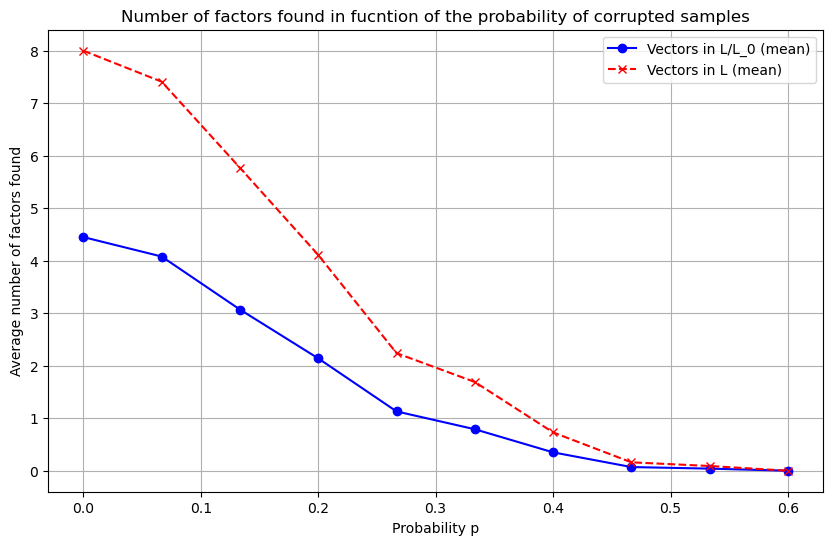

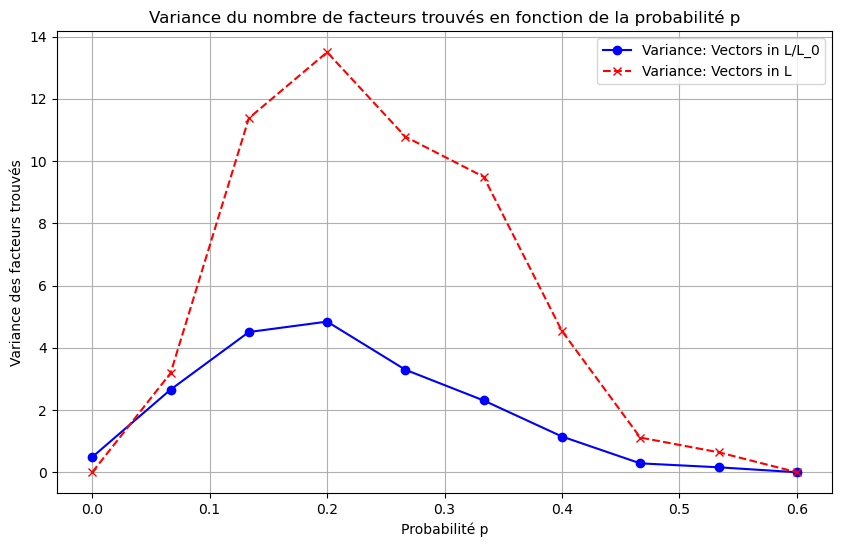

In [8]:
import numpy as np
import matplotlib.pyplot as plt

probabilities = np.linspace(0.0, 0.6, 10)
avgfactor_counts = []
varfactor_counts = []  # Pour stocker les variances des facteurs
avgfactor_and_trivial_counts = []
varfactor_and_trivial_counts = []  # Pour stocker les variances des facteurs (avec trivials)
numbertrials = 100

[N, factors] = sample_integer(t=2, l=30, verbose=False)
n = N.nbits()
print(N)
d = ceil(sqrt(n))

B = generate_basis_for_factoring(N, factors, d=d, verbose=False)
simulator_noisy_r = Simulator_noisy(B, verbose=False)
R = get_regev_R(C=2, n=N.nbits())

for p in probabilities:
    factor_counts = []
    factor_and_trivial = []
    
    for i in range(numbertrials):
        samples_1 = simulator_noisy_r.sample_error_model(R=R, m1=(d + 4), p=p, eta=0, verbose=False)
        factors, n_factors, n_trivial_factors = solve_samples_for_factors(samples_1, N, R, verbose=False)
        
        # Compter le nombre de facteurs trouvés
        factor_counts.append(n_factors)
        factor_and_trivial.append(n_factors + n_trivial_factors)
    
    # Calcul de la moyenne et de la variance
    avgfactor = np.mean(factor_counts)
    varfactor = np.var(factor_counts)
    avgfactor_counts.append(avgfactor)
    varfactor_counts.append(varfactor)

    avgfactor_and_trivial = np.mean(factor_and_trivial)
    varfactor_and_trivial = np.var(factor_and_trivial)
    avgfactor_and_trivial_counts.append(avgfactor_and_trivial)
    varfactor_and_trivial_counts.append(varfactor_and_trivial)


    print(f"p={p:.2f} -> Avg factors: {avgfactor:.2f}, Variance: {varfactor:.2f}")
    print(f"p={p:.2f} -> Avg factors+trivial: {avgfactor_and_trivial:.2f}, Variance: {varfactor_and_trivial:.2f}")


plt.figure(figsize=(10, 6))
plt.plot(probabilities, avgfactor_counts, marker='o', linestyle='-', color='b', label="Vectors in L/L_0 (mean)")
plt.plot(probabilities, avgfactor_and_trivial_counts, marker='x', linestyle='--', color='r', label="Vectors in L (mean)")
plt.title("Number of factors found in fucntion of the probability of corrupted samples")
plt.xlabel("Probability p")
plt.ylabel("Average number of factors found")
plt.legend()
plt.grid(True)
plt.show()

# Graphique des variances
plt.figure(figsize=(10, 6))
plt.plot(probabilities, varfactor_counts, marker='o', linestyle='-', color='b', label="Variance: Vectors in L/L_0")
plt.plot(probabilities, varfactor_and_trivial_counts, marker='x', linestyle='--', color='r', label="Variance: Vectors in L")
plt.title("Variance of the number of factors found in function of p")
plt.xlabel("Probability p")
plt.ylabel("Variance ")
plt.legend()
plt.grid(True)
plt.show()


## Number of factors found in function of the probability of corrupted samples with Ragavan's additionnal post-processing procedure

841772584938602881


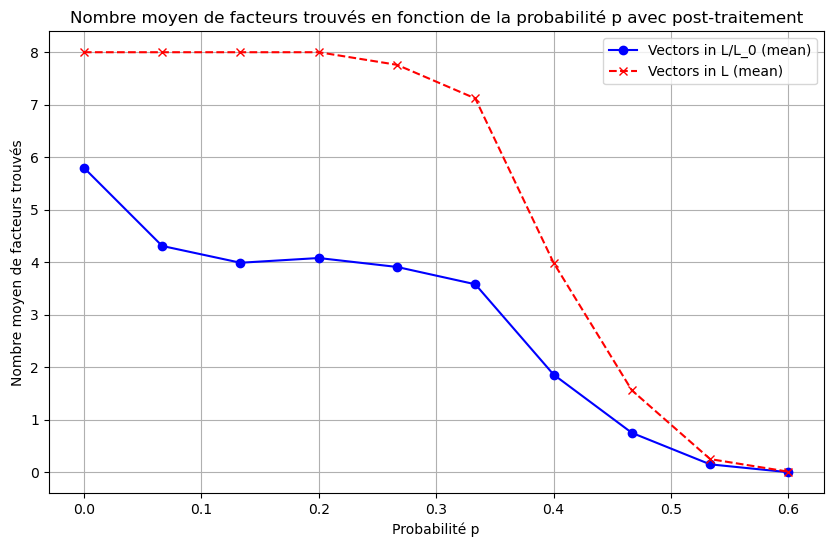

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Probabilities
probabilities = np.linspace(0.0, 0.6, 10)

avgfactor_counts = []
varfactor_counts = []  # Pour stocker les variances des facteurs
avgfactor_and_trivial_counts = []
varfactor_and_trivial_counts = []  # Pour stocker les variances des facteurs (avec trivials)
numbertrials = 100


alpha = 7
gamma = 5.9


[N, factors] = sample_integer(t=2, l=30, verbose=False)
n = N.nbits()
print(N)
d = ceil(np.sqrt(n))

B = generate_basis_for_factoring(N, factors, d=d, verbose=False)
simulator_noisy_r = Simulator_noisy(B, verbose=False)
R = get_regev_R(C=2, n=N.nbits())


for p in probabilities:
    factor_counts = []
    factor_and_trivial = []
    
    for i in range(numbertrials):
        samples = simulator_noisy_r.sample_error_model(R=R, m1=alpha * (d + 4), p=p, eta=0, verbose=False)
        selected_samples = lattice_postprocessing(samples, R=R, d=d, gamma=gamma, alpha=alpha, verbose=False)
        
        
        factors, n_factors, n_trivial_factors = solve_samples_for_factors(selected_samples, N, R, verbose=False)
        
       
        factor_counts.append(n_factors)
        factor_and_trivial.append(n_factors + n_trivial_factors)
    

    avgfactor = np.mean(factor_counts)
    varfactor = np.var(factor_counts)
    avgfactor_counts.append(avgfactor)
    varfactor_counts.append(varfactor)

    avgfactor_and_trivial = np.mean(factor_and_trivial)
    varfactor_and_trivial = np.var(factor_and_trivial)
    avgfactor_and_trivial_counts.append(avgfactor_and_trivial)
    varfactor_and_trivial_counts.append(varfactor_and_trivial)


stdfactor_counts = np.sqrt(varfactor_counts)
stdfactor_and_trivial_counts = np.sqrt(varfactor_and_trivial_counts)


plt.figure(figsize=(10, 6))
plt.plot(probabilities, avgfactor_counts, marker='o', linestyle='-', color='b', label="Vectors in L/L_0 (mean)")
plt.plot(probabilities, avgfactor_and_trivial_counts, marker='x', linestyle='--', color='r', label="Vectors in L (mean)")
#plt.errorbar(probabilities, avgfactor_counts, yerr=stdfactor_counts, fmt='o-', color='b', label="Vectors in L/L_0 (mean)")
#plt.errorbar(probabilities, avgfactor_and_trivial_counts, yerr=stdfactor_and_trivial_counts, fmt='x--', color='r', label="Vectors in L (mean)")
plt.title("Average number of factors found as a function of probability p with post-processing")
plt.xlabel("Probability p")
plt.ylabel("Average number of factors found")
plt.legend()
plt.grid(True)
plt.show()



Comparision of the average number of factor found with and without Ragavan's postprocessing procedure 

424696006297644502919018583835912256875265466000499569543061


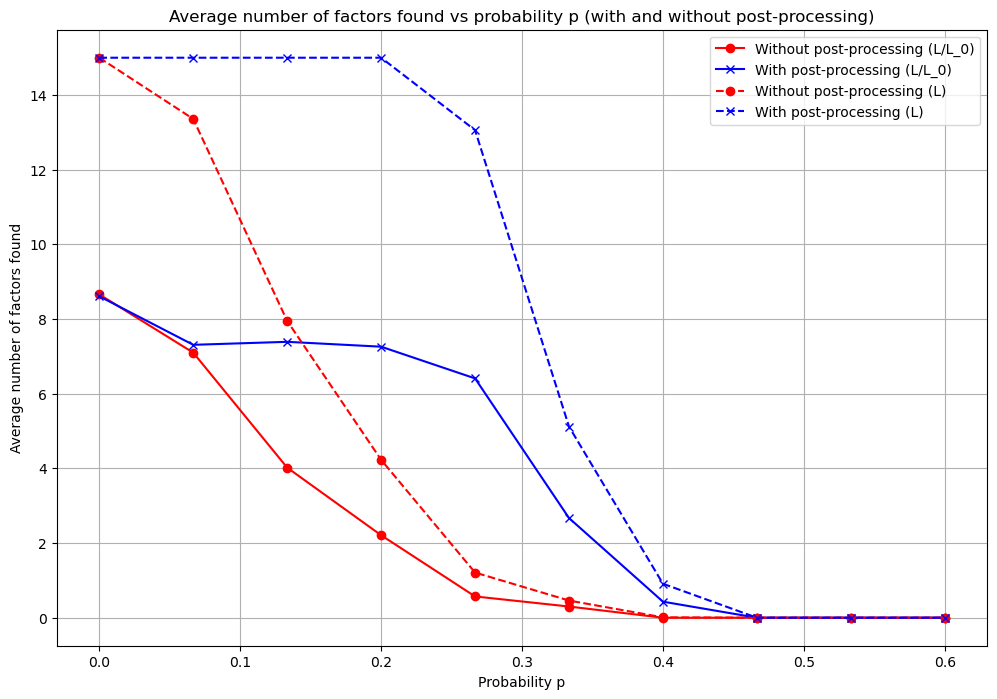

In [34]:
import numpy as np
import matplotlib.pyplot as plt


probabilities = np.linspace(0.0, 0.6, 10)
numbertrials = 100

#parameters for Ragavan's post-processing procedure
alpha = 7
gamma = 5.9


[N, factors] = sample_integer(t=2, l=100, verbose=False)
n = N.nbits()
print(N)
d = ceil(np.sqrt(n))


B = generate_basis_for_factoring(N, factors, d=d, verbose=False)
simulator_noisy_r = Simulator_noisy(B, verbose=False)
R = get_regev_R(C=2, n=N.nbits())


avgfactor_counts_classic = []
varfactor_counts_classic = []
avgfactor_counts_post = []
varfactor_counts_post = []

avgfactor_and_trivial_counts_classic = []
varfactor_and_trivial_counts_classic = []
avgfactor_and_trivial_counts_post = []
varfactor_and_trivial_counts_post = []


for p in probabilities:
    
    factor_counts_classic = []
    factor_and_trivial_classic = []

    
    factor_counts_post = []
    factor_and_trivial_post = []
    
    for i in range(numbertrials):
        
        samples = simulator_noisy_r.sample_error_model(R=R, m1=(d + 4), p=p, eta=0, verbose=False)
        samples1 = simulator_noisy_r.sample_error_model(R = R, m1=alpha*(d+4), p=p, eta = 0,verbose = False)

        #classical procedure
        factors_classic, n_factors_classic, n_trivial_factors_classic = solve_samples_for_factors(samples, N, R, verbose=False)
        factor_counts_classic.append(n_factors_classic)
        factor_and_trivial_classic.append(n_factors_classic + n_trivial_factors_classic)

        #procedure with additionnal post processing
        selected_samples = lattice_postprocessing(samples1, R=R, d=d, gamma=gamma, alpha=alpha, verbose=False)
        factors_post, n_factors_post, n_trivial_factors_post = solve_samples_for_factors(selected_samples, N, R, verbose=False)
        factor_counts_post.append(n_factors_post)
        factor_and_trivial_post.append(n_factors_post + n_trivial_factors_post)
    
    
    avgfactor_classic = np.mean(factor_counts_classic)
    varfactor_classic = np.var(factor_counts_classic)
    avgfactor_counts_classic.append(avgfactor_classic)
    varfactor_counts_classic.append(varfactor_classic)

    avgfactor_and_trivial_classic = np.mean(factor_and_trivial_classic)
    varfactor_and_trivial_classic = np.var(factor_and_trivial_classic)
    avgfactor_and_trivial_counts_classic.append(avgfactor_and_trivial_classic)
    varfactor_and_trivial_counts_classic.append(varfactor_and_trivial_classic)

    avgfactor_post = np.mean(factor_counts_post)
    varfactor_post = np.var(factor_counts_post)
    avgfactor_counts_post.append(avgfactor_post)
    varfactor_counts_post.append(varfactor_post)

    avgfactor_and_trivial_post = np.mean(factor_and_trivial_post)
    varfactor_and_trivial_post = np.var(factor_and_trivial_post)
    avgfactor_and_trivial_counts_post.append(avgfactor_and_trivial_post)
    varfactor_and_trivial_counts_post.append(varfactor_and_trivial_post)

stdfactor_counts_classic = np.sqrt(varfactor_counts_classic)
stdfactor_counts_post = np.sqrt(varfactor_counts_post)

stdfactor_and_trivial_counts_classic = np.sqrt(varfactor_and_trivial_counts_classic)
stdfactor_and_trivial_counts_post = np.sqrt(varfactor_and_trivial_counts_post)


plt.figure(figsize=(12, 8))


plt.plot(probabilities, avgfactor_counts_classic, marker='o', linestyle='-', color='r', label="Without post-processing (L/L_0)")
plt.plot(probabilities, avgfactor_counts_post, marker='x', linestyle='-', color='b', label="With post-processing (L/L_0)")


plt.plot(probabilities, avgfactor_and_trivial_counts_classic, marker='o', linestyle='--', color='r', label="Without post-processing (L)")
plt.plot(probabilities, avgfactor_and_trivial_counts_post, marker='x', linestyle='--', color='b', label="With post-processing (L)")

plt.title("Average number of factors found vs probability p (with and without post-processing)")
plt.xlabel("Probability p")
plt.ylabel("Average number of factors found")
plt.legend()
plt.grid(True)
plt.show()
